# Problem Satements:

#     Water Quality Prediction 

# import necessary libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv('C:\\Users\\abc\\Downloads\\project\\archive\\waterQuality1.csv')
df.shape

(1000, 21)

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Target Variable meaning:

is_safe = 1 means Good Quality or safe water


is_safe = 0 means Bad Quality of water

In [4]:
#cheak any Nan value present in dataset
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [5]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2.446280,15.485030,0.025030,2.042160,0.004488,4.070580,0.443880,1.029920,0.771510,0.502910,0.382641,0.103221,9.56723,1.489360,0.005195,29.441210,4.042680,0.04970,0.246640,0.044680,0.651000
std,1.433042,8.719787,0.014742,1.134923,0.002547,2.252979,0.261701,0.580523,0.435526,0.282662,0.382362,0.056014,5.53147,0.280884,0.002967,16.509726,2.273725,0.02877,0.144351,0.026915,0.476892
min,0.000000,0.020000,0.001000,0.010000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.01000,1.000000,0.000000,0.070000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.147500,8.235000,0.010000,1.040000,0.002000,2.160000,0.210000,0.540000,0.407500,0.260000,0.005000,0.054000,4.82000,1.250000,0.003000,15.465000,2.130000,0.02750,0.120000,0.020000,0.000000
50%,2.505000,15.735000,0.030000,2.030000,0.004000,4.130000,0.440000,1.050000,0.765000,0.510000,0.510000,0.105000,9.67000,1.480000,0.005000,29.390000,4.110000,0.05000,0.240000,0.050000,1.000000
75%,3.670000,23.182500,0.040000,3.010000,0.007000,6.070000,0.670000,1.530000,1.160000,0.740000,0.740000,0.152000,14.35500,1.730000,0.008000,43.632500,5.962500,0.07000,0.370000,0.070000,1.000000
max,5.000000,29.840000,0.050000,4.000000,0.009000,7.990000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,18.99000,2.000000,0.010000,59.740000,7.990000,0.10000,0.500000,0.090000,1.000000


# EDA

<AxesSubplot:xlabel='is_safe', ylabel='count'>

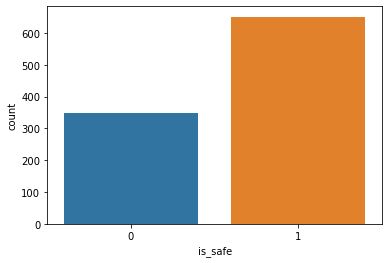

In [6]:
sns.countplot(x='is_safe',data=df)

In [7]:
df['is_safe'].value_counts()

1    651
0    349
Name: is_safe, dtype: int64

The above plot showss that 
   1. There are 651 records shows water is safe
   2. and 349 record shows water is not safe


# So this is balaced dataset

<AxesSubplot:>

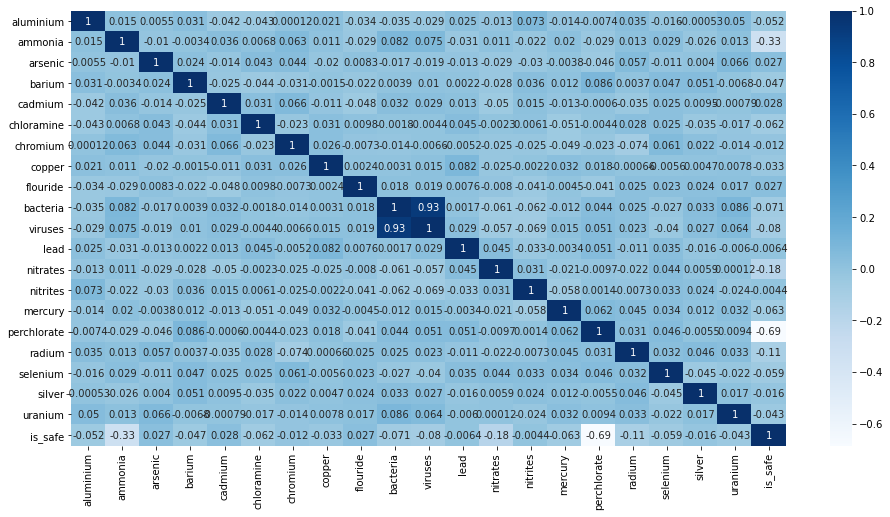

In [8]:
plt.figure(figsize=(16,8))

sns.heatmap(df.corr(),annot=True,cmap='Blues')

Heatmap shows bacteria and viruses are highly corealated so we can drop one of them


In [9]:
df.drop(df[['viruses']],axis=1,inplace=True)

   # Cheak impact of bacteria on water Quality

<AxesSubplot:xlabel='is_safe', ylabel='bacteria'>

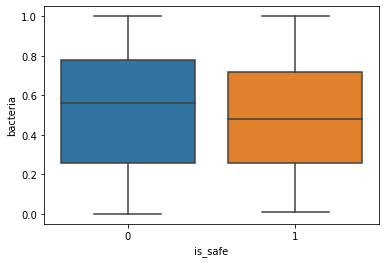

In [10]:
sns.boxplot(x='is_safe',y='bacteria',data=df)

Above boxplot shows that safe water(is_safe=1) have less bacteria compared to  water which is not safe(is_safe=0)

<AxesSubplot:xlabel='is_safe', ylabel='aluminium'>

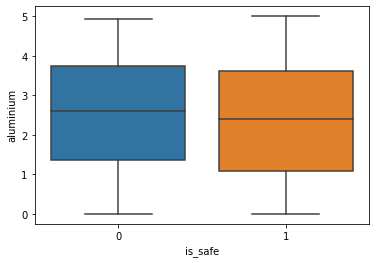

In [11]:
sns.boxplot(x='is_safe',y=df['aluminium'],data=df)

In [12]:
df.groupby('is_safe').mean()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
is_safe,,,,,,,,,,,,,,,,,,,
0,2.548653,19.389713,0.024479,2.114814,0.004390,4.262178,0.447994,1.056447,0.755673,0.530315,0.103708,10.918309,1.491060,0.005450,44.885616,4.388195,0.052006,0.249771,0.046275
1,2.391398,13.391736,0.025326,2.003210,0.004541,3.967865,0.441674,1.015699,0.780000,0.488218,0.102960,8.842919,1.488449,0.005058,21.161490,3.857450,0.048464,0.244962,0.043825


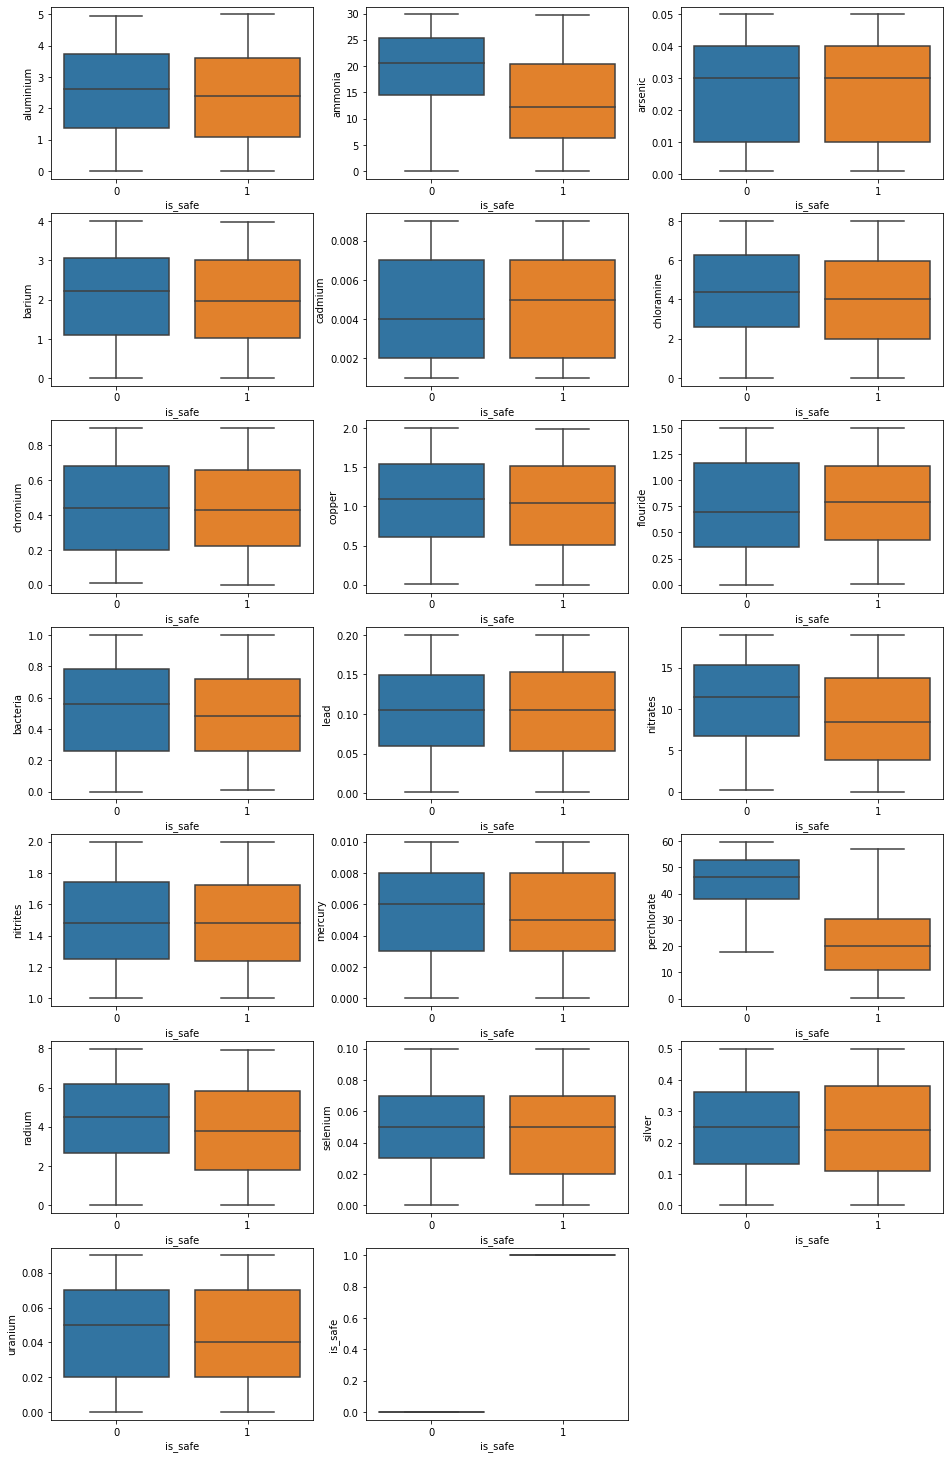

In [13]:
plt.figure(figsize=(16,26))
for i,val in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(x='is_safe',y=df[val],data=df)
    

Above Subplot shows these are the features which highly decides Quality of water ['aluminium', 'ammonia','barium', 'cadmium', 'chloramine', 'flouride', 'bacteria', 'nitrates','mercury','perchlorate', 'radium',
       'uranium']

In [14]:
from sklearn.model_selection import train_test_split

In [26]:
x = df.iloc[:,0:19]
y = df.is_safe

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

# Feature Importance

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x,y)

ExtraTreesClassifier()

<AxesSubplot:>

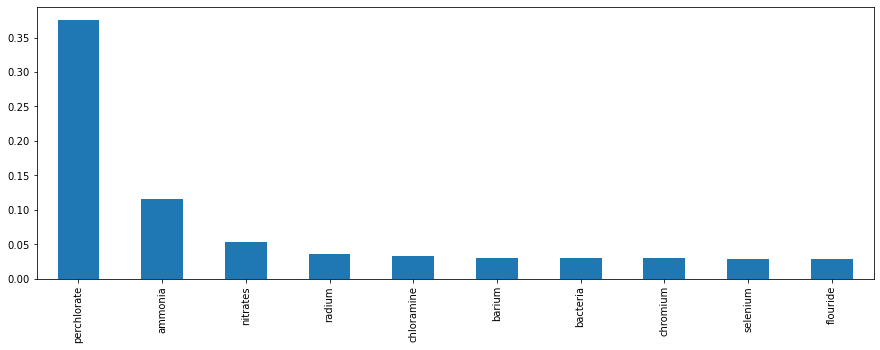

In [64]:
plt.figure(figsize=(15,5))
feature_impo = pd.Series(clf.feature_importances_,index=x.columns)
feature_impo.nlargest(10).plot(kind='bar')

In [18]:
df.shape

(1000, 20)

# Model Building

# 1. Random Forest 


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [30]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.932

# confusion matrix

In [33]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 79,   9],
       [  8, 154]], dtype=int64)

Text(33.0, 0.5, 'Actual')

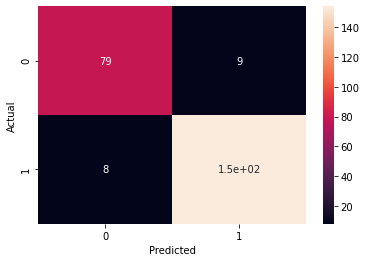

In [34]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. Naive Bayes


In [35]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [36]:
bays_pred = clf.predict(x_test)
accuracy_score(y_test,bays_pred)

0.944

# confusion_matrix 

In [37]:
cm=confusion_matrix(y_test,bays_pred)
cm

array([[ 81,   7],
       [  7, 155]], dtype=int64)

Text(33.0, 0.5, 'Actual')

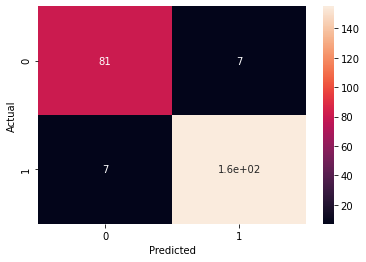

In [38]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)


C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
log_pred = logistic.predict(x_test)
accuracy_score(y_test,log_pred)

0.968

# confusion matrix

In [41]:
cm=confusion_matrix(y_test,log_pred)
cm

array([[ 86,   2],
       [  6, 156]], dtype=int64)

Text(33.0, 0.5, 'Actual')

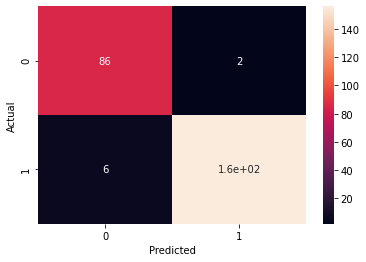

In [42]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [45]:
logistic.score(x_train,y_train)

0.9666666666666667

# Out of these 3 model Logistic Regression Gives Highest Accuracy of 96%

# conclusion : 

After trying and testing 3 different algorithms, the best accuracy on the dataset is achieved by Logistic Regression (96%) 

# Save model

In [46]:
import joblib
joblib.dump(logistic,'Water_Quality1.pkl')
log_reg=joblib.load('Water_Quality1.pkl')

In [47]:
log_reg.score(x_test,y_test)*100

96.8